In [1]:
import pandas as pd
import numpy as np

initial_data = pd.read_csv('train_2v.csv', sep=',',
                           names=['ID', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
                                  'Type_Of_Work', 'Residence', 'Avg_Glucose', 'BMI', 'Smoking_Status', 'Stroke'])

initial_data = initial_data.drop(index=0).reset_index()#dropping index
initial_data = initial_data.drop(columns=['index', 'ID'])

i = 0
for idx, row in initial_data.iterrows():                #data is biased towards people with stroke = 0
    if int(row["Stroke"]) == 0:                         #deleting data with stroke = 0
        initial_data.drop(idx, inplace=True)
        i += 1 
    if i == 40000:                                      #size of dataset = 40000
        break

initial_data = initial_data.reset_index()
initial_amount_data = len(initial_data)
print('Initial amount of data -> ', initial_amount_data)

# grouping and counting values by output value
print("\n Data grouped by Stroke : ")
print(initial_data.groupby('Stroke').count())
print("\n Data grouped by Gender : ")
print(initial_data.groupby('Gender').count())

initial_data_not_stroke = len([i for i in initial_data['Stroke'] if int(i) == 0])
initial_data_stroke = len([i for i in initial_data['Stroke'] if int(i) == 1])

data = initial_data.copy()

for idx, row in enumerate(data.values):
    if isinstance(data['Smoking_Status'].loc[idx], float):
        stroke_value = data['Stroke'].loc[idx]
        data.drop(idx, inplace=True)                        # Removing rows with no information about smoking status
        

print("\n Grouping and counting values by output value")
print(data.groupby('Stroke').count())

data_without_gaps = len(data)
print('\nAmount of data after delete gaps for smoking status -> ', data_without_gaps)

data = data.reset_index()

for idx, row in data.iterrows():
    if float(row['Age']) > 120:  # Removing values with people who has is more than 120 years, because we'are assuming that is impossible
        data.drop(idx, inplace=True)

print('\nAfter removing too large amount of years\n', data.groupby('Age').count())


data_not_stroke = len([i for i in data['Stroke'] if int(i) == 0])
data_stroke = len([i for i in data['Stroke'] if int(i) == 1])

print('\n\nStatistic informations after processing of data...\n')
print('Saved percent of whole data ->', round((data_without_gaps/initial_amount_data)*100, 2))
print('Saved percent of stroke output ->', round((data_stroke/initial_data_stroke)*100, 2))
print('Saved percent of not stroke output ->', round((data_not_stroke/initial_data_not_stroke)*100, 2))
print('There is {0} gaps in whole dataset. All of them will be replaced by mean value of column'
      .format(data.isna().sum()['BMI']))

data = data.astype({'BMI': np.float})
data[data == np.inf] = np.nan
data.fillna(data['BMI'].mean(), inplace=True)

# mixed order of columns for future simpler ways to processing
data_in_proper_order = data[['Type_Of_Work', 'Smoking_Status', 'Gender', 'Ever_Married', 'Residence', 'BMI',
                             'Age', 'Hypertension', 'Heart_Disease', 'Avg_Glucose', 'Stroke']]

name_save = 'Preprocessed_stroke_data.csv'
data_in_proper_order.to_csv(name_save, index=False)

print('\n\nData saved in location -> ', name_save)

Initial amount of data ->  3400

 Data grouped by Stroke : 
        index  Gender   Age  Hypertension  Heart_Disease  Ever_Married  \
Stroke                                                                   
0        2617    2617  2617          2617           2617          2617   
1         783     783   783           783            783           783   

        Type_Of_Work  Residence  Avg_Glucose   BMI  Smoking_Status  
Stroke                                                              
0               2617       2617         2617  2527            1809  
1                783        783          783   643             638  

 Data grouped by Gender : 
        index   Age  Hypertension  Heart_Disease  Ever_Married  Type_Of_Work  \
Gender                                                                         
Female   2006  2006          2006           2006          2006          2006   
Male     1393  1393          1393           1393          1393          1393   
Other       1     1

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


data = pd.read_csv('Preprocessed_stroke_data.csv', sep=',')


X = data.iloc[:, :-1].values    # matrix of features/attributes upto Avg_Glucose
y = data.iloc[:, -1].values     # vector of Stroke variables
#print(X)
#print(y)

labelencoder_X = LabelEncoder()
for i in range(5):               # encoding valuesof all text attributes
    X[:, i] = labelencoder_X.fit_transform(X[:, i])
print("the encoded values for 5 columns: ")
print(X)

# Splitting the dataset into the Training set(90%) and Test set(10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Linear Kernel SVM to the Training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results based on training set
y_pred = classifier.predict(X_test)
print("y_pred :")
print(y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred) 
print("the confusion matrix obtained is : ")
print(cm)

the encoded values for 5 columns: 
[[2 0 1 ... 0 1 228.69]
 [3 1 0 ... 0 0 202.21]
 [2 1 1 ... 0 1 105.92]
 ...
 [2 0 0 ... 1 0 91.94]
 [2 1 1 ... 0 0 99.16]
 [2 1 0 ... 0 0 79.48]]


/home/ashika/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ashika/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ashika/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


y_pred :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the confusion matrix obtained is : 
[[166  14]
 [ 52  13]]


graph predicting stroke using BMI and Heart Disease
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


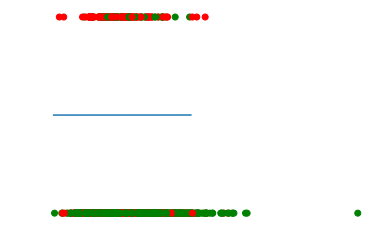

In [3]:
#from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

print("graph predicting stroke using BMI and Heart Disease")
# Plot data points and color using their class
color = ['red' if stroke == 1 else 'green' for stroke in y_train]
plt.scatter(X_train[:,5], X_train[:,8], c=color)
print(classifier.coef_)
print(classifier.intercept_)
# Create the hyperplane
w = classifier.coef_[0]
a = -w[5] / w[8]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[8]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

graph predicting stroke using Age and Heart Disease
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


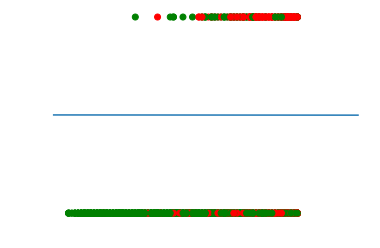

In [4]:
#from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

print("graph predicting stroke using Age and Heart Disease")
# Plot data points and color using their class
color = ['red' if stroke == 1 else 'green' for stroke in y_train]
plt.scatter(X_train[:,6], X_train[:,8], c=color)
print(classifier.coef_)
print(classifier.intercept_)
# Create the hyperplane
w = classifier.coef_[0]
a = -w[6] / w[8]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[8]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

Graph predicting stroke using Heart Disease and Average Glucose
i : 0
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


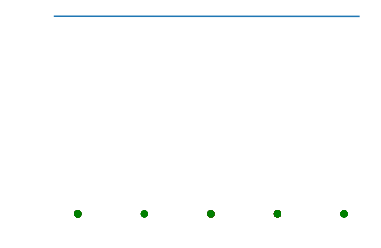

i : 0
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


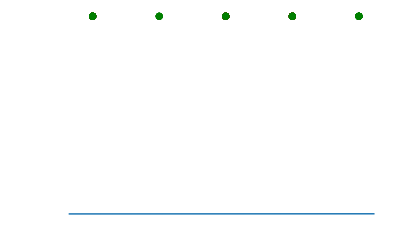

i : 0
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


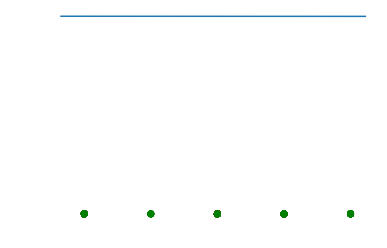

i : 0
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


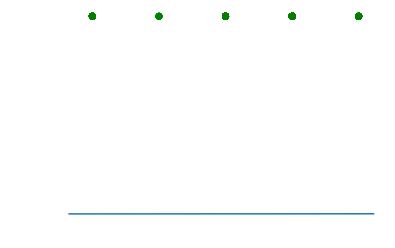

i : 0
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


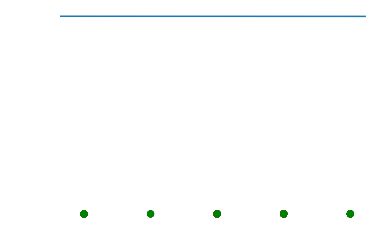

i : 0
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


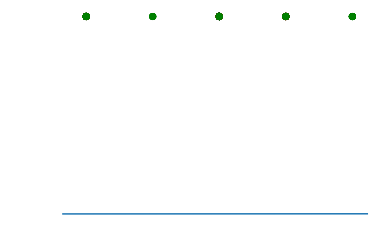

i : 0
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


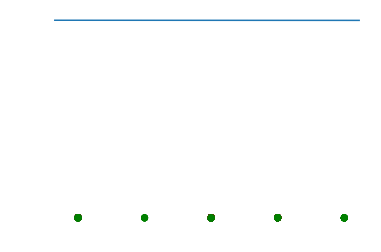

i : 0
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


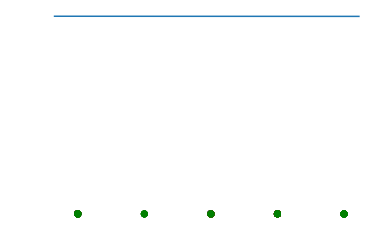

i : 0
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


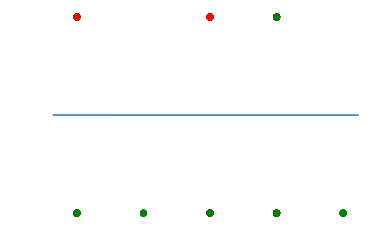

i : 0
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


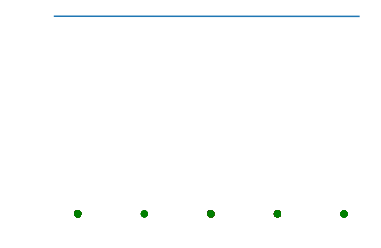

i : 1
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


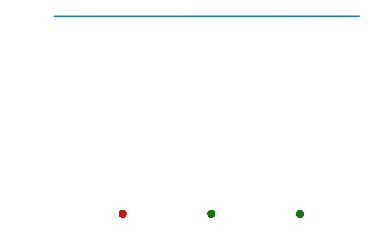

i : 1
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


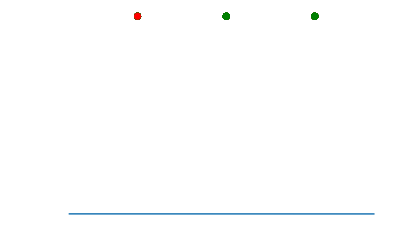

i : 1
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


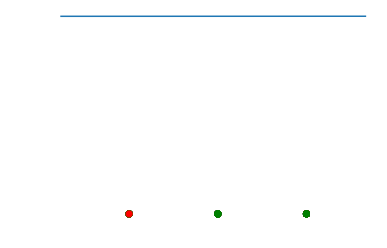

i : 1
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


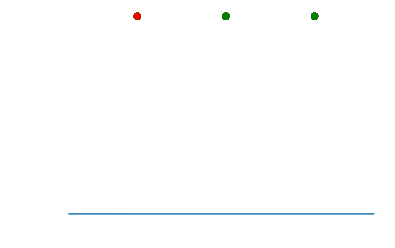

i : 1
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


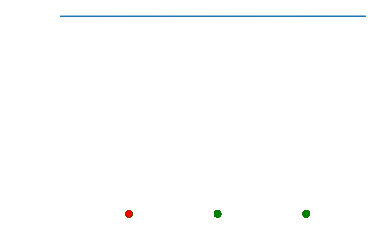

i : 1
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


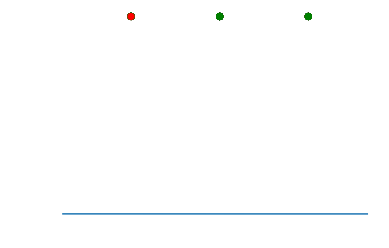

i : 1
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


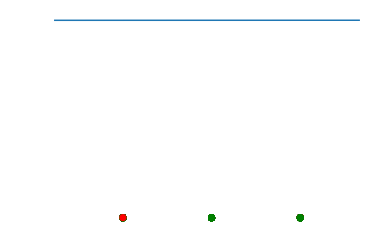

i : 1
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


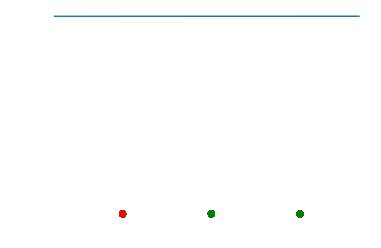

i : 1
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


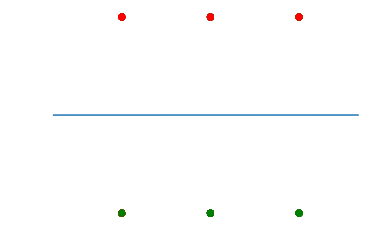

i : 1
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


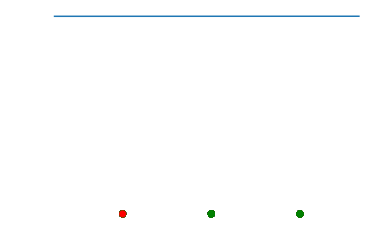

i : 2
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


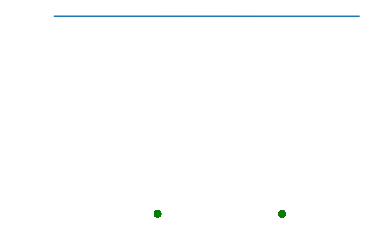

i : 2
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


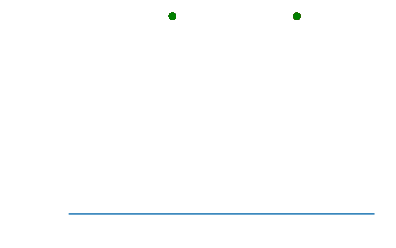

i : 2
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


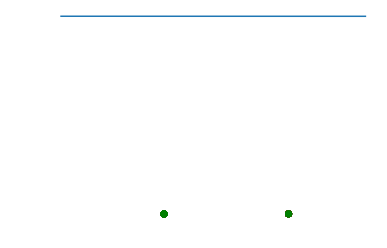

i : 2
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


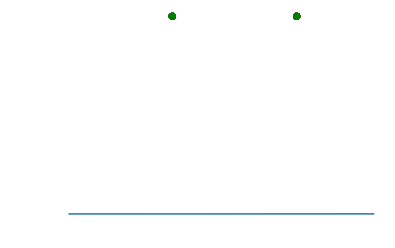

i : 2
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


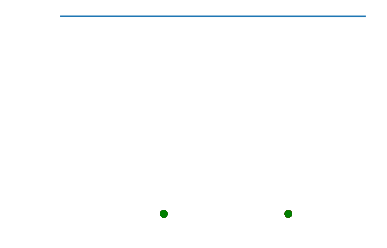

i : 2
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


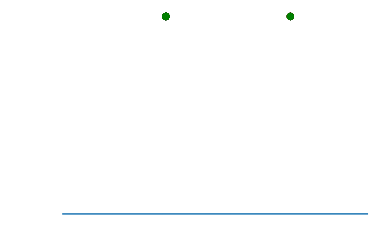

i : 2
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


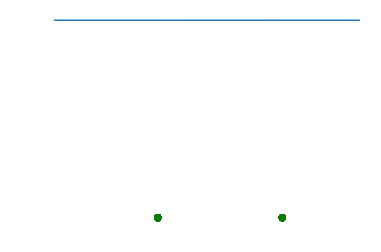

i : 2
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


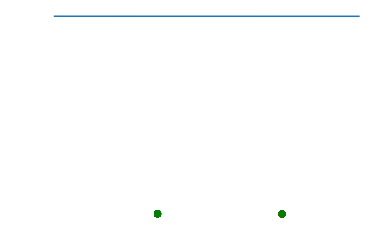

i : 2
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


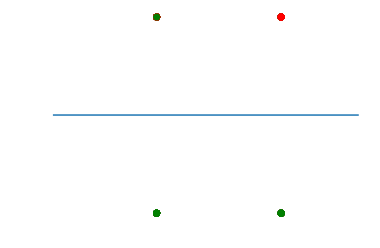

i : 2
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


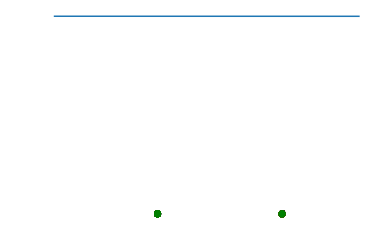

i : 3
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


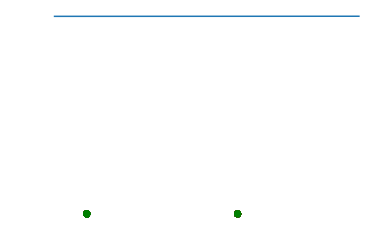

i : 3
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


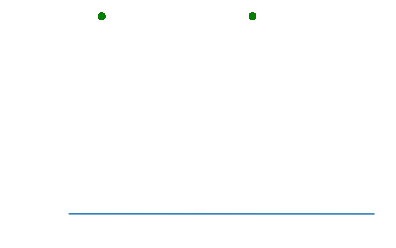

i : 3
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


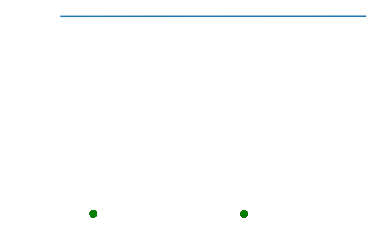

i : 3
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


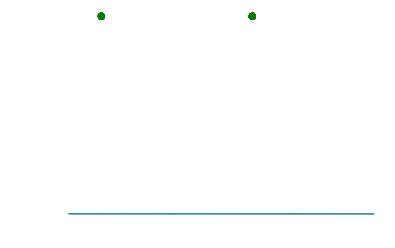

i : 3
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


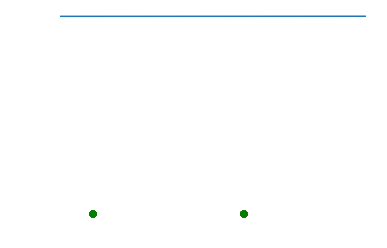

i : 3
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


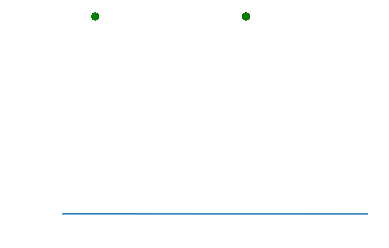

i : 3
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


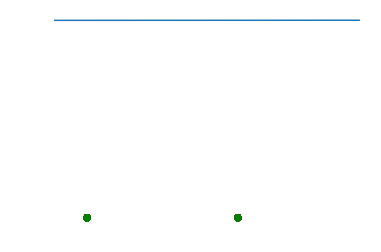

i : 3
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


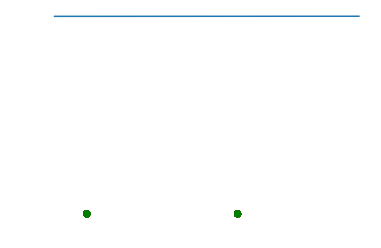

i : 3
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


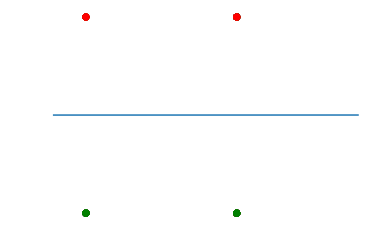

i : 3
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


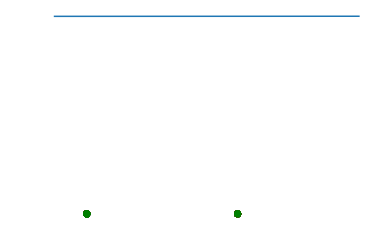

i : 4
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


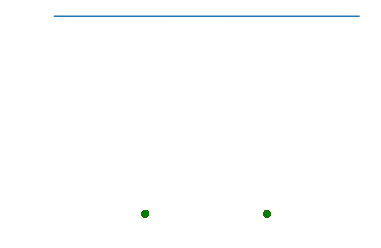

i : 4
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


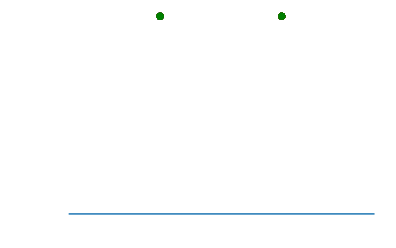

i : 4
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


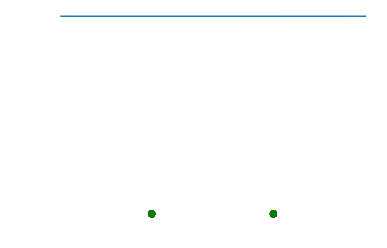

i : 4
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


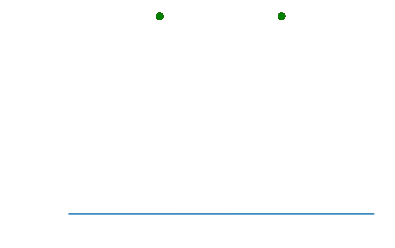

i : 4
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


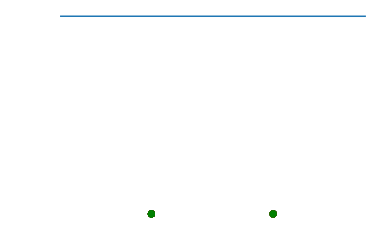

i : 4
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


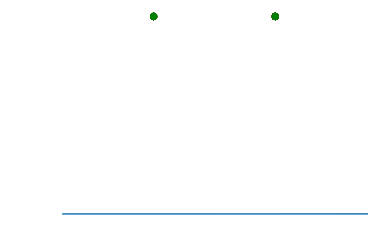

i : 4
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


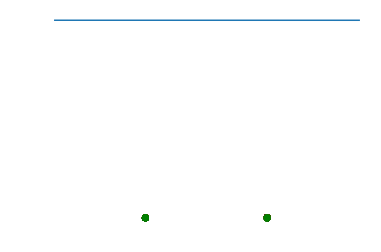

i : 4
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


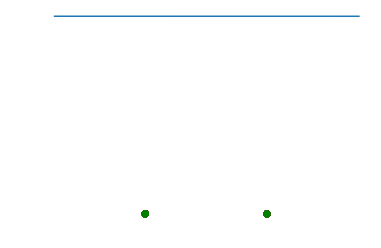

i : 4
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


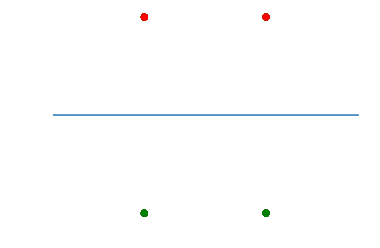

i : 4
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


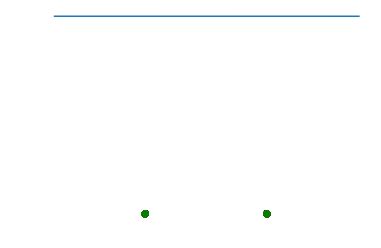

i : 5
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


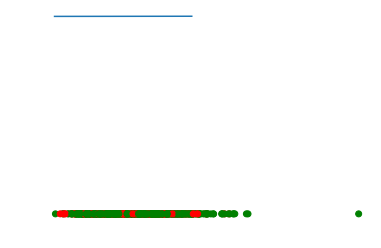

i : 5
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


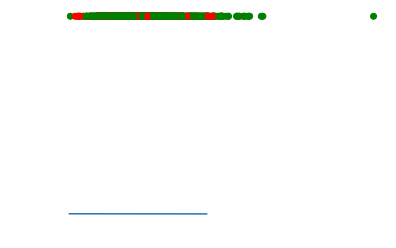

i : 5
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


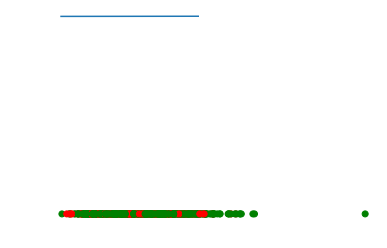

i : 5
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


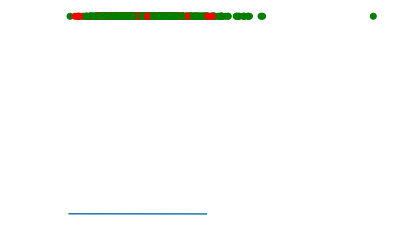

i : 5
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


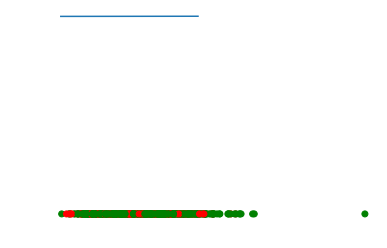

i : 5
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


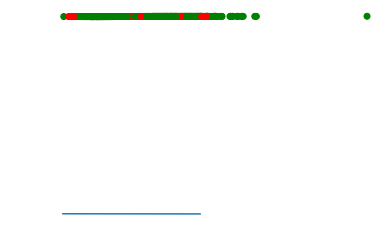

i : 5
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


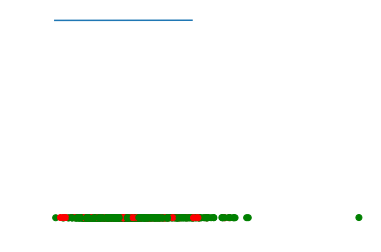

i : 5
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


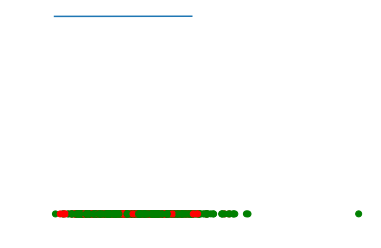

i : 5
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


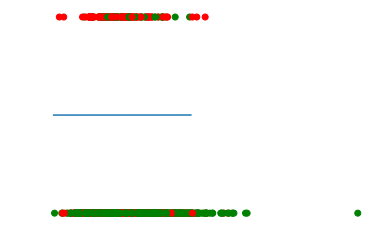

i : 5
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


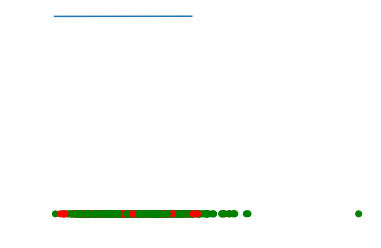

i : 6
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


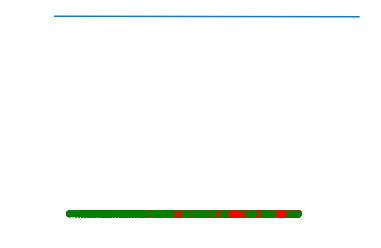

i : 6
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


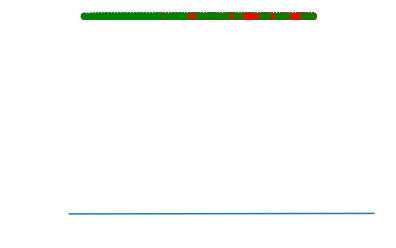

i : 6
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


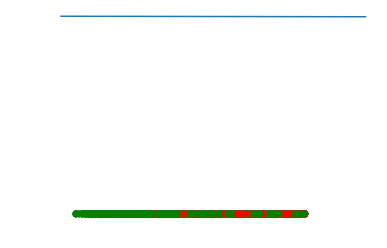

i : 6
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


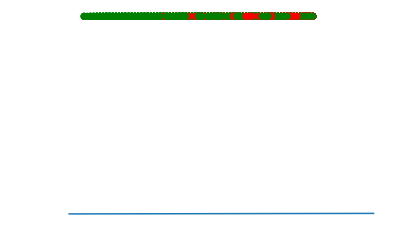

i : 6
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


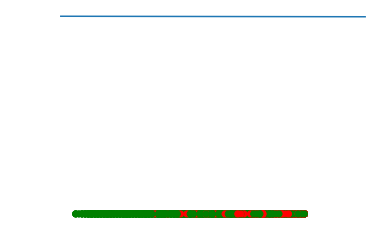

i : 6
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


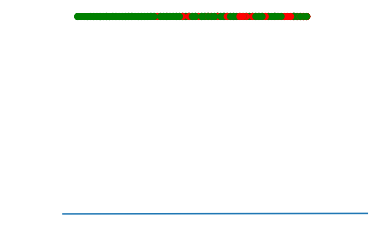

i : 6
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


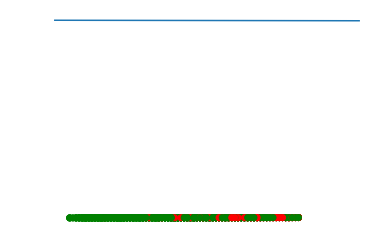

i : 6
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


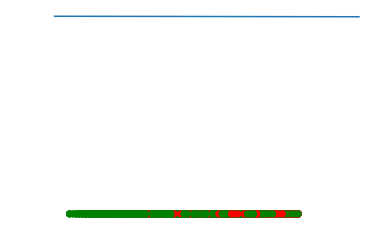

i : 6
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


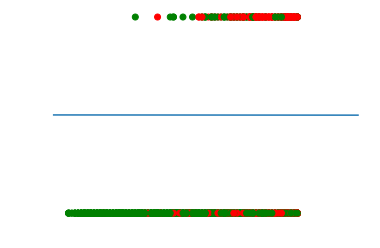

i : 6
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


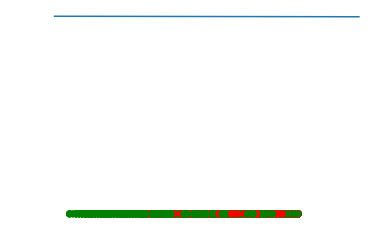

i : 7
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


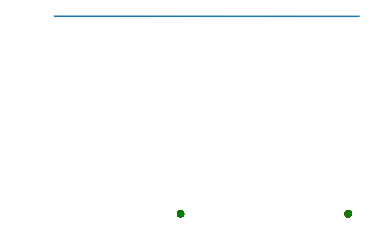

i : 7
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


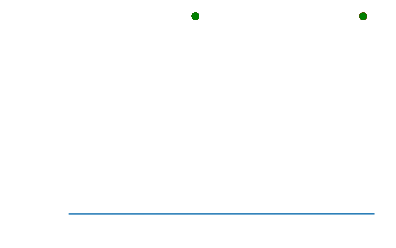

i : 7
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


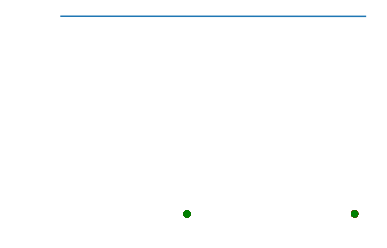

i : 7
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


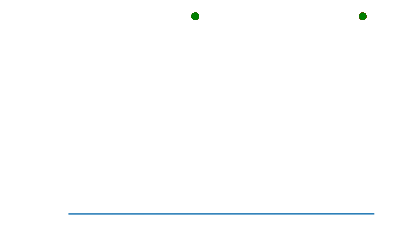

i : 7
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


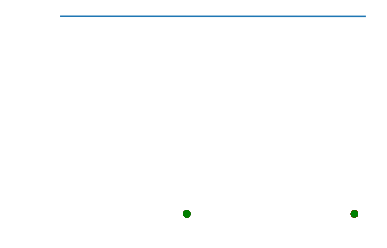

i : 7
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


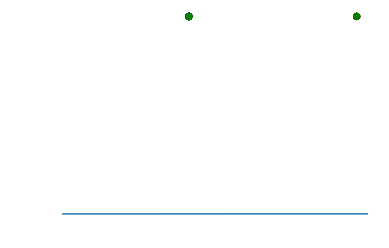

i : 7
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


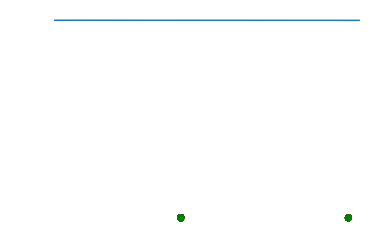

i : 7
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


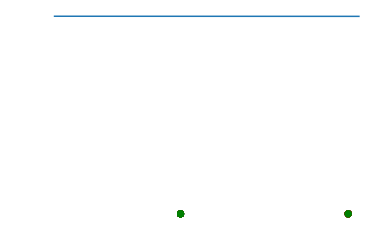

i : 7
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


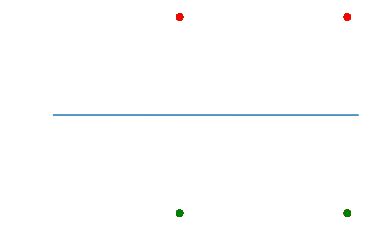

i : 7
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


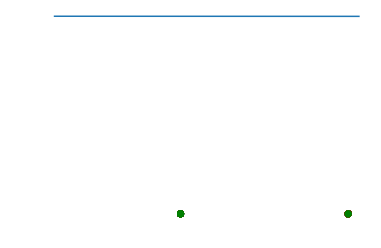

i : 8
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


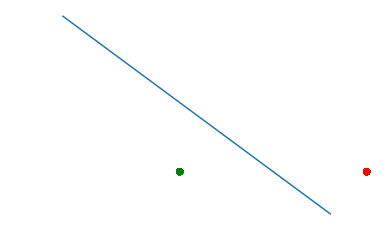

i : 8
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


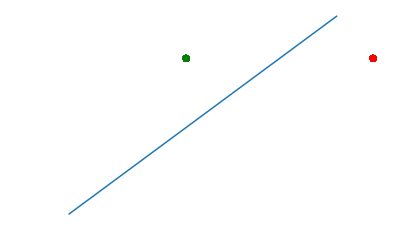

i : 8
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


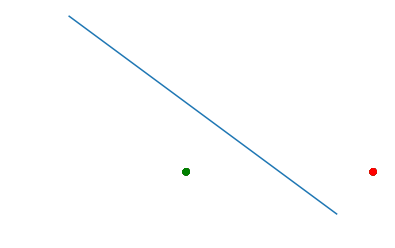

i : 8
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


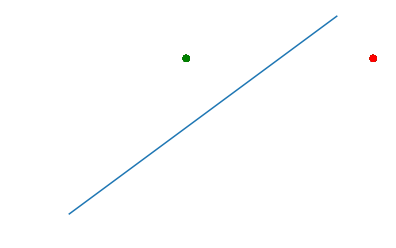

i : 8
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


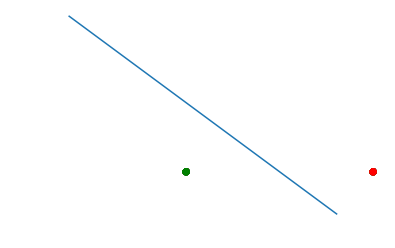

i : 8
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


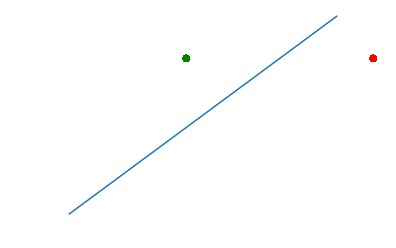

i : 8
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


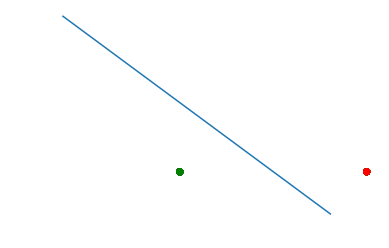

i : 8
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


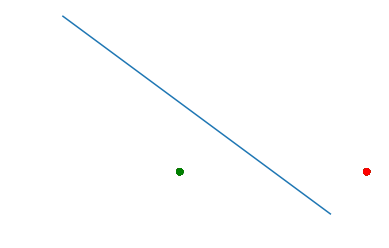

i : 8
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


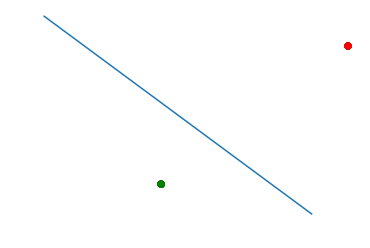

i : 8
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


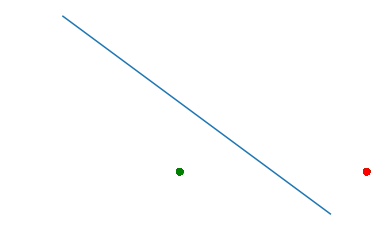

i : 9
j : 0
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


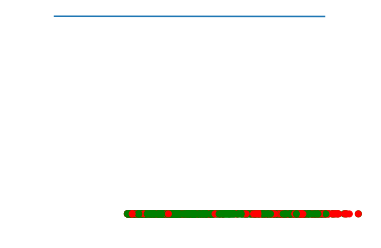

i : 9
j : 1
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


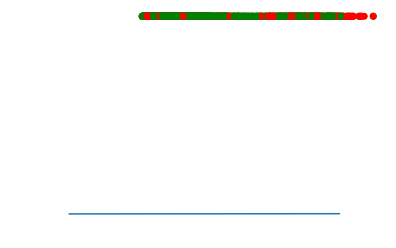

i : 9
j : 2
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


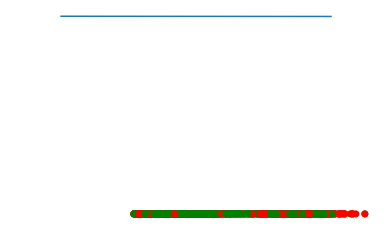

i : 9
j : 3
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


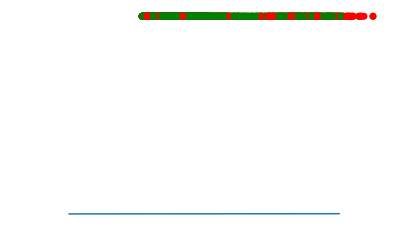

i : 9
j : 4
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


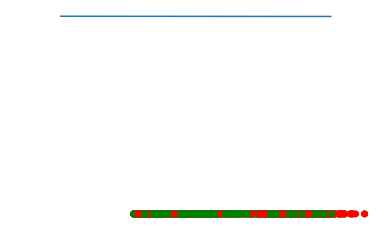

i : 9
j : 5
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


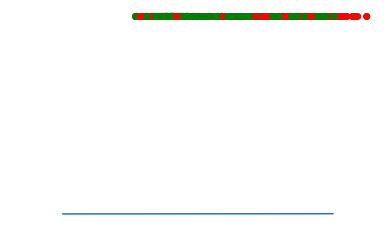

i : 9
j : 6
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


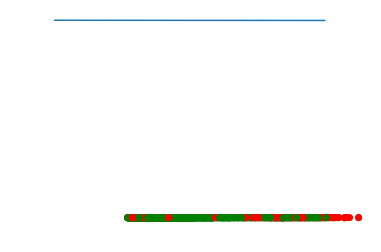

i : 9
j : 7
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


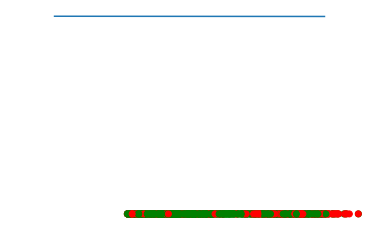

i : 9
j : 8
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


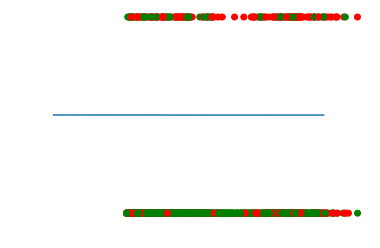

i : 9
j : 9
[[ 1.11098493e-04 -4.77540378e-05  4.03754183e-05 -8.10470912e-05
   1.83837455e-05 -1.21599602e-04  4.29925184e-04  8.98321266e-05
   5.71898466e-01  1.82927695e-04]]
[-0.82022191]


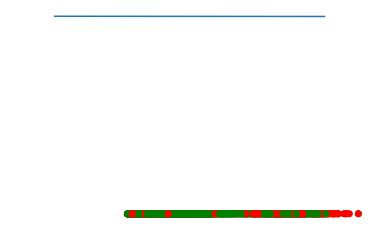

In [7]:
#from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

print("Graph predicting stroke using Heart Disease and Average Glucose")
# Plot data points and color using their class
color = ['red' if stroke == 1 else 'green' for stroke in y_train]
for i in range(0,10):
    for j in range(0,10):
        print("i :",i)
        print("j :",j)
        plt.scatter(X_train[:,i], X_train[:,j], c=color)
        print(classifier.coef_)
        print(classifier.intercept_)
        # Create the hyperplane
        w = classifier.coef_[0]
        a = -w[i] / w[j]
        xx = np.linspace(-2.5, 2.5)
        yy = a * xx - (classifier.intercept_[0]) / w[j]

        # Plot the hyperplane
        plt.plot(xx, yy)
        plt.axis("off"), plt.show();
